In [2]:
from numpy import loadtxt
data = loadtxt('jaroE-V.dat')
k='jarosite '

In [3]:
x = data[:, 0]
y = data[:, 1]
print(x)
print(y)
print(len(x))
print(type(x))
print(len(y))

[702. 780. 795. 810. 830. 858. 936.]
[-467.156 -469.389 -469.594 -469.695 -469.688 -469.482 -468.246]
7
<class 'numpy.ndarray'>
7


E0=-469.68410531496136 eV
B0=37.00046157228206 GPa
Bp=-0.09968360702481688
V0=821.210046935272 ang


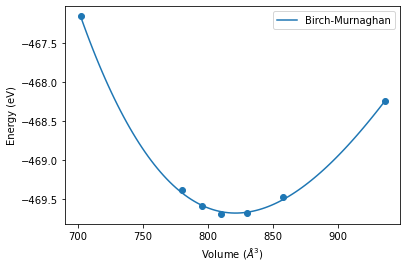

In [4]:


import sys, numpy, math
from scipy.optimize import leastsq




# Birch-Murnaghan equation of state
def eos_birch_murnaghan(params, vol):
    
    E0, B0, Bp, V0 = params 
    eta = (vol/V0)**(1.0/3.0)
    E = E0 + 9.0*B0*V0/16.0 * (eta**2-1.0)**2 * (6.0 + Bp*(eta**2-1.0) - 4.0*eta**2)
    return E





# Customized input with default and accepted values
def myinput(prompt, default, accepted):
    while True:
        res = raw_input(prompt + " [default=%s]: " % (default))
        if res == '': res = default
        if res in accepted:
            break
        else:
            print ("accepted values:", accepted)
    return res



vol=x
ene=y



# and bulk modulus
a, b, c = numpy.polyfit(vol, ene, 2)
V0 = -b/(2*a)
E0 = a*V0**2 + b*V0 + c
B0 = 2*a*V0
Bp = 4.0

# initial guesses in the same order used in the Murnaghan function
x0 = [E0, B0, Bp, V0]

def print_params(label, params):
    E0, B0, Bp, V0 = params
    print ('E0='+str(E0)+' eV')
    print ('B0='+str(B0*160.21765)+' GPa' )
    print ('Bp='+str(Bp))
    print ('V0='+str(V0)+' ang')

   



target = lambda params, y, x: y - eos_birch_murnaghan(params, x)
birch_murn, ier = leastsq(target, x0, args=(ene,vol))
print_params("Birch-Murnaghan", birch_murn)




try:
    import pylab
except ImportError:
    sys.stderr.write("pylab module non available, skipping plot")
    sys.exit(0)



import pylab
vfit = numpy.linspace(min(vol),max(vol),100)

pylab.scatter(vol,ene)
pylab.plot(vfit, eos_birch_murnaghan(birch_murn,vfit), label='Birch-Murnaghan')



pylab.xlabel('Volume ($\AA^3$)')
pylab.ylabel('Energy (eV)')
pylab.legend(loc='best')
from matplotlib import pyplot as plt
t=k+ 'e-v.png'
plt.savefig(t,dpi=500,transparent= False,facecolor='w', edgecolor='w')
pylab.show()

quit()